# Finals Data

Given that not all teams made it to the finals, the focus is to see how they each contributed to a champion's success. Another feature of interest is the years of playoff experience. 

Need to still visualize and understand season's data to see where team ranks in offensive and defensive measures.

In [18]:
#modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats

%matplotlib inline

In [10]:
#get finals data for players and coaches
player_finals = pd.read_csv('players_finals.csv', index_col='Unnamed: 0').reset_index(drop=True)
coach_finals = pd.read_csv('coaches_finals.csv', index_col='Unnamed: 0').reset_index(drop=True)

#features for each table
print('Player features:\n', player_finals.columns.values)
print('\nCoach features:\n', coach_finals.columns.values)

Player features:
 ['Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA' '3P%'
 '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST' 'STL'
 'BLK' 'TOV' 'PF' 'PTS' 'Year' 'Champ' 'Runner-Up']

Coach features:
 ['Coach' 'Team' 'F-Seasons' 'Car-Seasons' 'CR-G' 'CR-W' 'CR-L' 'FR-G'
 'FR-W' 'FR-L' 'Car-G' 'Car-W' 'Car-L' 'Car-W%' 'CP-G' 'CP-W' 'CP-L'
 'FP-G' 'FP-W' 'FP-L' 'Car.P-G' 'Car.P-W' 'Car.P-L' 'Year' 'Champ'
 'Runner-Up']


In [11]:
#split features
player_num_features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
player_cat_features = ['Player', 'Pos', 'Tm', 'Year', 'Champ', 'Runner-Up']

coach_num_features = ['F-Seasons', 'Car-Seasons', 'CR-G', 'CR-W', 'CR-L', 'FR-G', 'FR-W', 'FR-L', 'Car-G', 'Car-W', 'Car-L', 'Car-W%', 'CP-G', 'CP-W', 'CP-L', 'FP-G', 'FP-W', 'FP-L', 'Car.P-G', 'Car.P-W', 'Car.P-L']
coach_cat_features = ['Coach', 'Team', 'Year', 'Champ', 'Runner-Up']

In [12]:
player_finals[player_num_features].describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,299.000000,...,340.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,28.278409,49.872159,22.840909,19.074148,3.016193,6.379830,0.460199,0.731534,1.964205,0.310388,...,0.738512,0.780398,2.628125,3.403977,1.809375,0.603693,0.438920,1.082386,1.631250,8.080398
std,4.436547,25.533133,29.009532,9.807006,2.459737,4.882035,0.089763,0.860994,2.101396,0.159383,...,0.149785,0.686323,1.894009,2.415604,1.887233,0.467597,0.546047,0.839466,0.725239,6.774398
min,19.000000,1.000000,0.000000,2.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,26.000000,0.750000,10.400000,1.275000,2.900000,0.414000,0.000000,0.100000,0.268500,...,0.658500,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.500000,1.100000,3.375000
50%,28.000000,57.000000,6.000000,18.250000,2.300000,4.900000,0.463000,0.500000,1.500000,0.351000,...,0.765000,0.600000,2.100000,2.650000,1.200000,0.500000,0.300000,0.800000,1.600000,5.950000
75%,32.000000,73.000000,50.250000,26.950000,3.800000,8.200000,0.514250,1.100000,3.100000,0.400500,...,0.837500,1.100000,3.400000,4.400000,2.300000,0.800000,0.600000,1.500000,2.100000,10.225000
max,39.000000,82.000000,82.000000,42.000000,10.500000,21.500000,0.800000,5.100000,11.700000,1.000000,...,1.000000,4.000000,8.600000,11.300000,9.800000,2.300000,6.000000,4.200000,6.000000,30.100000


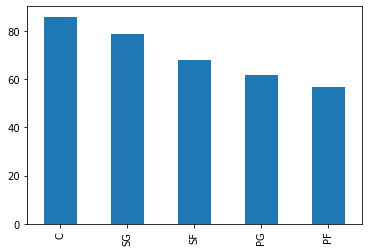

In [20]:
#position distribution
pd.value_counts(player_finals['Pos']).plot.bar()
plt.show()

***My initial assumption*** was that we would have five unique values (PG, SG, SF, PF, C). However, there are players that play multiple roles consistently throughout the season. Given this, I'm going to add a class for whether it is a frontcourt or backcourt player. There is still the issue of intersections as we have players in the SF-SG and SG-PF bars.

**Decision so far** Add the FC/BC classification, and consider adding both depending on how many players (and how impactful those players are) tinker in both sides.